In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import scipy as sc
import copy
import matplotlib.gridspec as gridspec
from matplotlib import cm

In [17]:
maxN = 5
Vinitial = 1

In [18]:
coords = np.mgrid[0:101, 0:51]
ygrid = coords[0,:,:]
xgrid = coords[1,:,:]

In [48]:
def V(x, y, maxN, L):
    sum = 0
    for n in range (1, maxN+1):
        if(n % 2 == 1):
            an = 4 * Vinitial / (n * np.pi)
            sum = sum + an * np.sin(n*np.pi*x / L) * np.exp(-n * np.pi * y / L)
    return sum

In [19]:
def Ex(x, y, maxN, L):
    sum = 0
    for n in range (1, maxN+1):
        if(n % 2 == 1):
            an = 4 * Vinitial / (n * np.pi)
            sum = sum - an * n * np.pi * (1/L) * np.cos(n*np.pi*x / L) * np.exp(-n * np.pi * y / L)
    return sum

In [20]:
def Ey(x, y, maxN, L):
    sum = 0
    for n in range (1, maxN+1):
        if(n % 2 == 1):
            an = 4 * Vinitial / (n * np.pi)
            sum = sum + an * n * np.pi * (1/L) * np.sin(n*np.pi*x / L) * np.exp(-n * np.pi * y / L)
    return sum

In [44]:
def plot_field_line(starting_point: tuple[float,float], x_end, y_end, step_size, maxN, L):
    current_point = starting_point
    
    while True:
        new_point = RK(current_point, step_size, maxN, L)
        plt.plot([current_point[0], new_point[0]], [current_point[1], new_point[1]], 'k-')
        if(should_terminate(new_point,x_end, y_end, step_size)):
            break
        current_point = new_point

In [45]:
def RK(starting_point, step_size, maxN, L):
    Ex_half = Ex(starting_point[0], starting_point[1], maxN, L)
    Ey_half = Ey(starting_point[0], starting_point[1], maxN, L)
    norm_half = (Ex_half ** 2 + Ey_half ** 2) ** .5

    x_half = Ex_half / norm_half * step_size * .5 + starting_point[0]
    y_half = Ey_half / norm_half * step_size * .5 + starting_point[1]

    #RK step

    Ex_dir = Ex(x_half, y_half, maxN, L)
    Ey_dir = Ey(x_half, y_half, maxN, L)
    norm = (Ex_dir ** 2 + Ey_dir ** 2) ** .5

    x_step = Ex_dir / norm * step_size + starting_point[0]
    y_step = Ey_dir / norm * step_size + starting_point[1]

    return (x_step,y_step)

In [46]:
def should_terminate(point, x_end, y_end, step_size):
    x, y = point
    if( x < 0 or x > x_end or y < 0 or y > y_end):
        return True
    return False

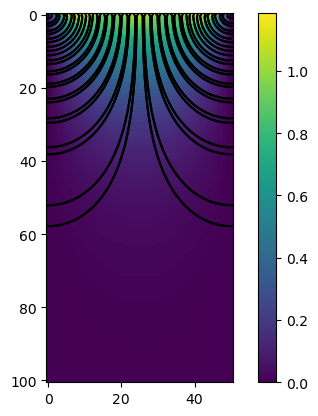

In [51]:
#launching field lines
Potential = V(xgrid, ygrid, maxN, 50)

for x in np.linspace(0,50,50):
    plot_field_line((x, 0), 50, 100, .5, 50, 50)

pl.imshow(Potential)
pl.colorbar()
pl.show()

1. The field lines are perpendicular to the equipotentials visible through the color gradient.
2. The field lines are farther apart as the potential shrinks, but group up where the potential is large.